In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
#from df_cleaned_data import get_df_cleaned_all_columns

In [2]:
from df_cleaned_data import get_df_cleaned_all_columns

      id  created_at  updated_at      priority sla_applied  \
0  55964  1726067375  1726662433  not_priority        None   
1  56125  1726247839  1726661724  not_priority        None   
2  56452  1726609852  1726661576  not_priority        None   
3  56468  1726618663  1726661460  not_priority        None   
4  56490  1726657272  1726657526  not_priority        None   

                                              source  \
0                                    RecovR For Cars   
1  We are still waiting on the replacement. I fac...   
2                           how do I remove an asset   
3  Hi, I'm having trouble with my RecovR Locator....   
4    \n   \n   \n   \n \n \n    \n\n     \n   \n ...   

                                  conversation_parts  \
0  {'type': 'conversation_part.list', 'conversati...   
1  {'type': 'conversation_part.list', 'conversati...   
2  {'type': 'conversation_part.list', 'conversati...   
3  {'type': 'conversation_part.list', 'conversati...   
4  {'type'

In [3]:
df_cleaned_all_columns = get_df_cleaned_all_columns()

In [4]:
df_cleaned_all_columns

,id,created_at,updated_at,priority,sla_applied,source,conversation_parts,topics,total_topics
0,55964,1726067375,1726662433,not_priority,None,RecovR For Cars,"{'type': 'conversation_part.list', 'conversati...",Re-stock Request,1
1,56125,1726247839,1726661724,not_priority,None,We are still waiting on the replacement. I fac...,"{'type': 'conversation_part.list', 'conversati...",Shipping Issues / RMA updates,1
2,56452,1726609852,1726661576,not_priority,None,how do I remove an asset,"{'type': 'conversation_part.list', 'conversati...",Incorrect car owner data in app,1
3,56468,1726618663,1726661460,not_priority,None,"Hi, I'm having trouble with my RecovR Locator....","{'type': 'conversation_part.list', 'conversati...",RMA - End of Life,1
4,56490,1726657272,1726657526,not_priority,None,\n \n \n \n \n \n \n\n \n \n ...,"{'type': 'conversation_part.list', 'conversati...",Other topics,1
...,...,...,...,...,...,...,...,...,...
35672,67,1612357800,1618413565,not_priority,None,Hi Maria! This is a bot speaking. I’m here to ...,"{'type': 'conversation_part.list', 'conversati...",Internal Testing,1
35673,18,1611063875,1618413562,not_priority,None,Test message outside business hours 😭,"{'type': 'conversation_part.list', 'conversati...",Internal Testing,1
35674,246,1615459219,1618396338,not_priority,None,does it work ? is my mail assigned to Clemens ...,"{'type': 'conversation_part.list', 'conversati...",Internal Testing,1
35675,189,1614264921,1618393703,not_priority,None,Hi Leverege! This is a bot speaking. I’m here ...,"{'type': 'conversation_part.list', 'conversati...",Internal Testing,1


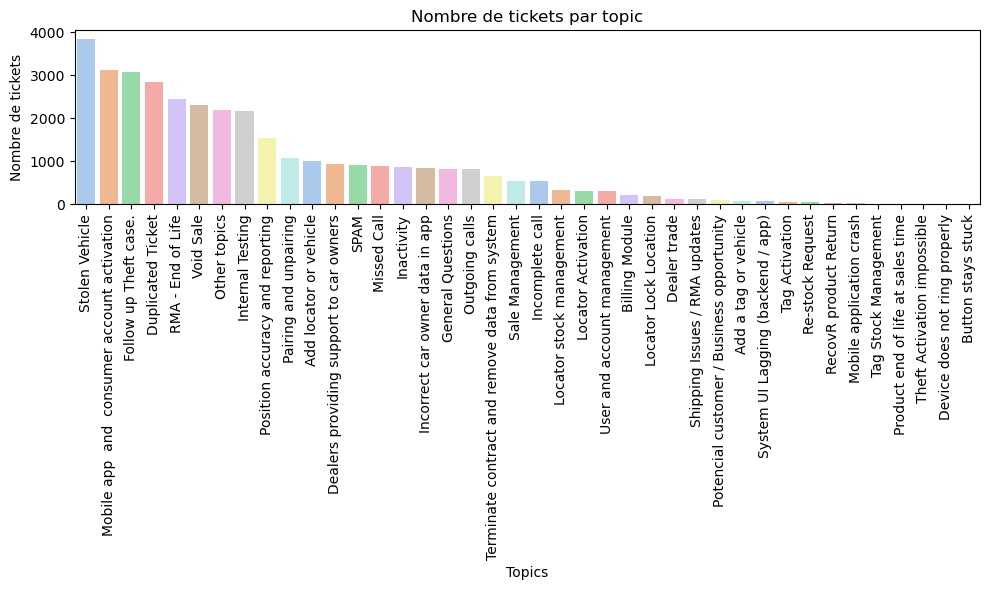

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='topics', data=df_cleaned_all_columns, palette='pastel', order=df_cleaned_all_columns['topics'].value_counts().index)
plt.title('Nombre de tickets par topic')
plt.xlabel('Topics')
plt.ylabel('Nombre de tickets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [5]:
# 2. Prendre un échantillon de 10% des données pour chaque topic
df_sampled = df_cleaned_all_columns.groupby('topics').apply(lambda x: x.sample(frac=0.1)).reset_index(drop=True)

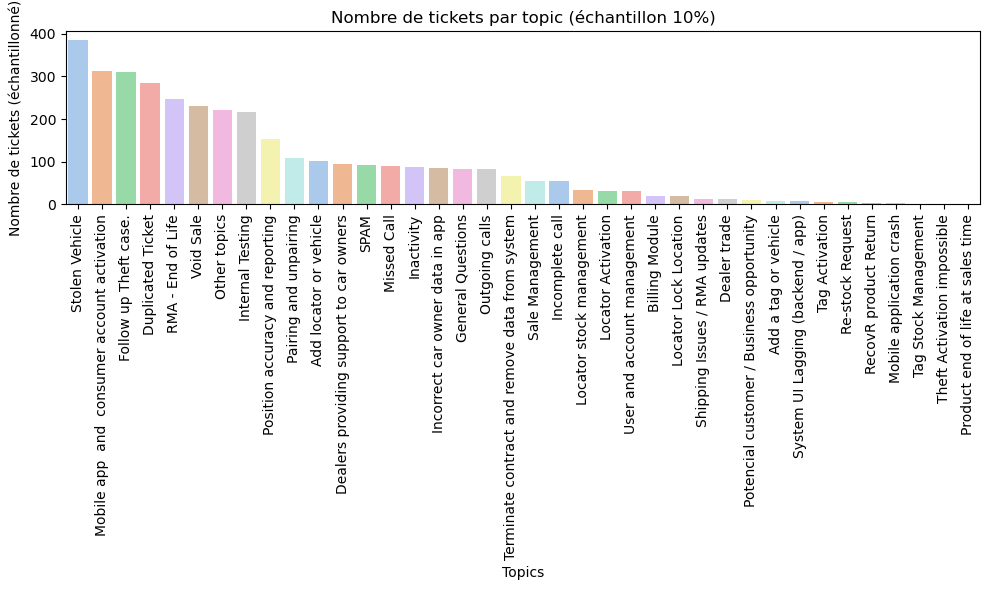

In [6]:
# 3. Refaire le graphique avec l'échantillon (10% des données)
plt.figure(figsize=(10, 6))
sns.countplot(x='topics', data=df_sampled, palette='pastel', order=df_sampled['topics'].value_counts().index)
plt.title('Nombre de tickets par topic (échantillon 10%)')
plt.xlabel('Topics')
plt.ylabel('Nombre de tickets (échantillonné)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
 #Calculer le nombre de clusters (égal au nombre de topics uniques)
num_clusters = df_sampled['topics'].nunique()

# Afficher le nombre de clusters (qui est égal au nombre de topics)
print(f"Nombre de clusters (égal au nombre de topics) : {num_clusters}")

Nombre de clusters (égal au nombre de topics) : 38


In [9]:
df_sampled

,id,created_at,updated_at,priority,sla_applied,source,conversation_parts,topics,total_topics
0,34818,1703964061,1703974581,not_priority,None,Customer Barbara Mahle vin #7JRA22TL1LG917658 ...,"{'type': 'conversation_part.list', 'conversati...",Add a tag or vehicle,1
1,46666,1715285495,1715286861,not_priority,None,Keys are not showing up in my assets.,"{'type': 'conversation_part.list', 'conversati...",Add a tag or vehicle,1
2,36427,1704483361,1726067194,not_priority,None,Inbound answered call on RecovR car owner support,"{'type': 'conversation_part.list', 'conversati...",Add a tag or vehicle,1
3,41612,1708827057,1708831103,not_priority,None,"Hi, my assets are not visible in the RecovR ap...","{'type': 'conversation_part.list', 'conversati...",Add a tag or vehicle,1
4,50647,1720798807,1720816459,not_priority,None,I am trying to create a vehicle and when I hav...,"{'type': 'conversation_part.list', 'conversati...",Add a tag or vehicle,1
...,...,...,...,...,...,...,...,...,...
3567,13156,1683302814,1688043685,not_priority,None,Inbound answered call on RecovR car dealership...,"{'type': 'conversation_part.list', 'conversati...",Void Sale,1
3568,29072,1697464435,1697465647,not_priority,None,ok,"{'type': 'conversation_part.list', 'conversati...",Void Sale,1
3569,1676,1644013763,1648546097,not_priority,None,We need to cancel a sale and repo a vehicle. ...,"{'type': 'conversation_part.list', 'conversati...",Void Sale,1
3570,1674,1643997226,1679335417,not_priority,None,"Hello, I need help voiding a sale involving ve...","{'type': 'conversation_part.list', 'conversati...",Void Sale,1


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# Étape 1 : Vectorisation des textes dans la colonne 'source'
# Utilisation de TF-IDF pour transformer les textes en vecteurs
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)  # max_features limite le nombre de mots à 1000
X_tfidf = tfidf.fit_transform(df_sampled['source'])


In [12]:
#for m in range(0,2):
#    for w in range(0,10):
 #      print(X_tfidf[m][w])

In [13]:
X_tfidf[0]

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [14]:
# Étape 2 : Appliquer K-means++ avec le nombre de clusters égal au nombre de topics
num_clusters = 38  # Nombre de clusters égal au nombre de topics
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans.fit(X_tfidf)

C:\Users\helpdesk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=38, random_state=42)

In [15]:
# Ajouter les labels des clusters au DataFrame échantillonné
df_sampled['cluster'] = kmeans.labels_

In [16]:
# Étape 3 : Visualisation des clusters
# Utiliser PCA pour réduire les dimensions des vecteurs TF-IDF à 2 pour la visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

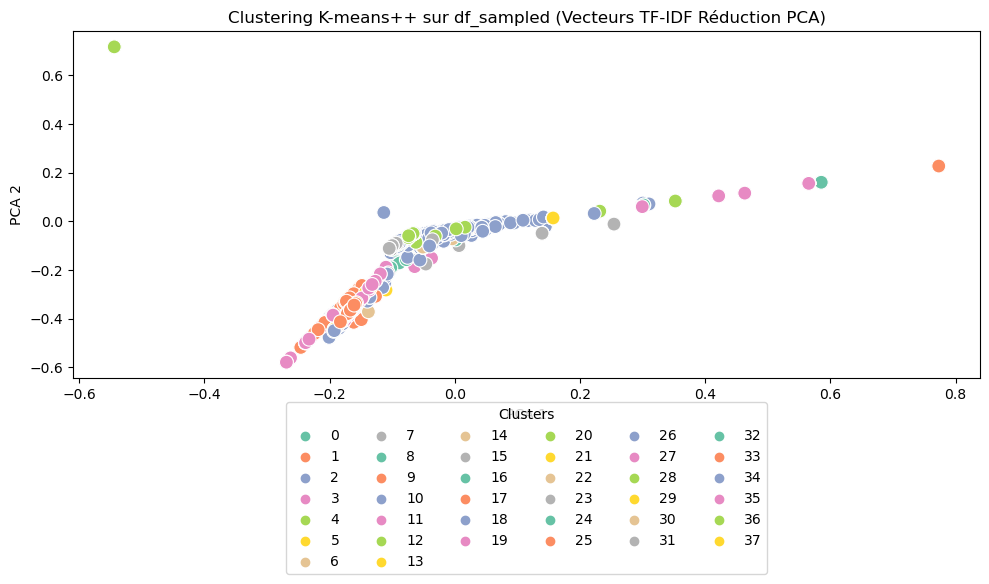

In [17]:
# Visualiser les clusters en 2D avec un graphique en nuage de points et une légende horizontale
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_sampled['cluster'], palette='Set2', s=100)
plt.title('Clustering K-means++ sur df_sampled (Vecteurs TF-IDF Réduction PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Ajuster la légende pour qu'elle soit horizontale
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=6, title='Clusters')

plt.tight_layout()
plt.show()




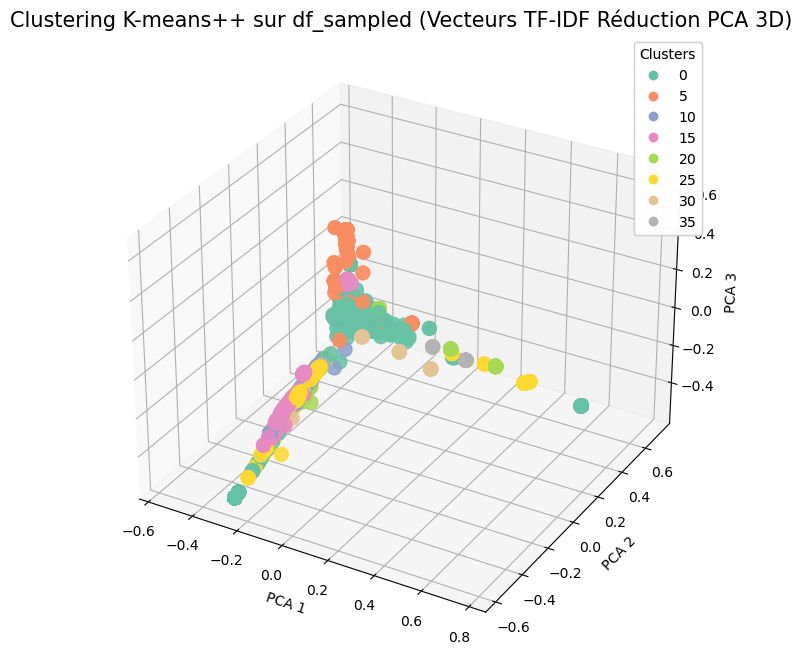

In [18]:
# Appliquer PCA pour réduire à 3 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_tfidf.toarray())  # Supposons que X_tfidf soit votre matrice TF-IDF

# Créer une figure 3D pour la visualisation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracer les points en 3D, colorés par les clusters
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_sampled['cluster'], cmap='Set2', s=100)

# Ajouter des étiquettes aux axes
ax.set_title('Clustering K-means++ sur df_sampled (Vecteurs TF-IDF Réduction PCA 3D)', fontsize=15)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Ajouter une légende avec les clusters
legend = ax.legend(*scatter.legend_elements(), title="Clusters", loc="best")
ax.add_artist(legend)

# Afficher le graphique
plt.show()

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Mesurer l'inertie (K-means)
inertia = kmeans.inertia_
print(f"Inertie (somme des distances au carré) : {inertia}")

# Mesurer l'indice de silhouette
silhouette_avg = silhouette_score(X_tfidf, df_sampled['cluster'])
print(f"Indice de silhouette : {silhouette_avg}")

# Mesurer l'indice de Davies-Bouldin
davies_bouldin = davies_bouldin_score(X_tfidf.toarray(), df_sampled['cluster'])
print(f"Indice de Davies-Bouldin : {davies_bouldin}")

Inertie (somme des distances au carré) : 1102.980734816692
Indice de silhouette : 0.5146784491605546
Indice de Davies-Bouldin : 1.7443704029254494


In [19]:
# Afficher les termes sélectionnés par TF-IDF
terms = tfidf.get_feature_names_out()  # Liste des termes
print(f"Nombre total de termes: {len(terms)}")
print(f"Exemples de termes: {terms[:10]}")  # Afficher les 10 premiers termes


Nombre total de termes: 1000
Exemples de termes: ['00' '01' '02' '03' '04' '05' '06' '07' '08' '09']


In [20]:
# Afficher les indices et les valeurs de TF-IDF pour le premier document
doc_id = 0  # Exemple pour le premier document
doc_vector = X_tfidf[doc_id]

# Convertir en format dense pour voir les valeurs (évitez cela sur de très gros ensembles de données)
dense_vector = doc_vector.toarray()

# Afficher les indices des termes non nuls et leurs valeurs correspondantes
non_zero_indices = doc_vector.nonzero()[1]
print(f"Indices non nuls dans le document {doc_id}: {non_zero_indices}")
print(f"Valeurs correspondantes: {dense_vector[0, non_zero_indices]}")

# Afficher les termes et leurs pondérations pour ce document
for idx in non_zero_indices:
    print(f"Terme: {terms[idx]}, TF-IDF: {dense_vector[0, idx]}")


Indices non nuls dans le document 0: [787 502 793 483 423 955 290]
Valeurs correspondantes: [0.4322708  0.42818155 0.47902494 0.46397347 0.24091746 0.19269691
 0.29982146]
Terme: saying, TF-IDF: 0.432270803054969
Terme: key, TF-IDF: 0.42818155300016103
Terme: second, TF-IDF: 0.47902494454350786
Terme: issues, TF-IDF: 0.4639734728460084
Terme: having, TF-IDF: 0.24091745661017464
Terme: vin, TF-IDF: 0.19269691023727006
Terme: customer, TF-IDF: 0.299821462511242


In [21]:
# Afficher les 10 termes les plus pondérés pour chaque document (les 5 premiers documents par exemple)
for doc_id in range(5):
    doc_vector = X_tfidf[doc_id].toarray()
    # Obtenir les indices des 10 termes les plus importants
    top_n_indices = doc_vector[0].argsort()[-10:][::-1]
    
    print(f"Document {doc_id}:")
    for idx in top_n_indices:
        print(f"  Terme: {terms[idx]}, TF-IDF: {doc_vector[0, idx]}")


Document 0:
  Terme: second, TF-IDF: 0.47902494454350786
  Terme: issues, TF-IDF: 0.4639734728460084
  Terme: saying, TF-IDF: 0.432270803054969
  Terme: key, TF-IDF: 0.42818155300016103
  Terme: customer, TF-IDF: 0.299821462511242
  Terme: having, TF-IDF: 0.24091745661017464
  Terme: vin, TF-IDF: 0.19269691023727006
  Terme: dissemination, TF-IDF: 0.0
  Terme: dodge, TF-IDF: 0.0
  Terme: does, TF-IDF: 0.0
Document 1:
  Terme: keys, TF-IDF: 0.679821781603513
  Terme: showing, TF-IDF: 0.5850004246479509
  Terme: assets, TF-IDF: 0.44228593513601894
  Terme: zoho, TF-IDF: 0.0
  Terme: does, TF-IDF: 0.0
  Terme: doesn, TF-IDF: 0.0
  Terme: doing, TF-IDF: 0.0
  Terme: don, TF-IDF: 0.0
  Terme: door, TF-IDF: 0.0
  Terme: downloaded, TF-IDF: 0.0
Document 2:
  Terme: inbound, TF-IDF: 0.4762849715152258
  Terme: owner, TF-IDF: 0.4543133666229842
  Terme: answered, TF-IDF: 0.433750251795224
  Terme: car, TF-IDF: 0.39928846160282416
  Terme: support, TF-IDF: 0.3471177325751793
  Terme: recovr, TF-

In [25]:
import gensim
from gensim.models import Word2Vec
import re
from nltk.corpus import stopwords

In [26]:
# Suppression des stopwords
stop_words = set(stopwords.words('english'))

In [27]:
# Fonction de prétraitement pour tokeniser et nettoyer les textes
def preprocess_text(text):
    # Supprimer les caractères spéciaux et les chiffres
    text = re.sub(r'\W+', ' ', text.lower())
    # Tokeniser les mots
    tokens = text.split()
    # Supprimer les stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Appliquer la fonction de prétraitement sur la colonne 'source'
df_sampled['tokenized_source'] = df_sampled['source'].apply(preprocess_text)

In [28]:
df_sampled['tokenized_source']

0       [need, transfer, recovr, device, customer, tra...
1                             [add, recovr, key, devices]
2       [change, vehicles, registration, area, longer,...
3                                                    [ok]
4       [inbound, answered, call, recovr, car, dealers...
                              ...                        
3567    [hello, vehicle, leave, without, recovr, regis...
3568    [hello, need, help, voiding, sale, involving, ...
3569    [inbound, answered, call, recovr, car, owner, ...
3570    [hello, list, contracts, needs, flat, cancelle...
3571                                                 [ok]
Name: tokenized_source, Length: 3572, dtype: object

In [30]:
df_sampled['tokenized_source'][98]

['hello',
 'tried',
 'add',
 'vin',
 '1fmsk8dh8ngb37986',
 'dealership',
 'received',
 'message',
 'vin',
 'already',
 'belongs',
 'customer',
 'could',
 'please',
 'help',
 'tried',
 'pair',
 'locator',
 'looks',
 'stuck',
 'voided',
 'reset',
 'vehicle']

In [32]:
# Entraîner le modèle Word2Vec
model_w2v = Word2Vec(sentences=df_sampled['tokenized_source'], vector_size=100, window=5, min_count=2, sg=1)

# Sauvegarder le modèle si besoin
model_w2v.save("word2vec_model.model")



In [34]:
import numpy as np
# Fonction pour obtenir la moyenne des vecteurs de mots pour un document
def document_vector(doc):
    # Retirer les mots qui ne sont pas dans le vocabulaire Word2Vec
    doc = [word for word in doc if word in model_w2v.wv.key_to_index]
    # Si aucun mot n'est dans le vocabulaire, retourner un vecteur de zéros
    if len(doc) == 0:
        return np.zeros(model_w2v.vector_size)
    # Calculer la moyenne des vecteurs de mots du document
    return np.mean(model_w2v.wv[doc], axis=0)

# Appliquer cela à chaque document dans le DataFrame
df_sampled['doc_vector'] = df_sampled['tokenized_source'].apply(document_vector)


C:\Users\helpdesk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


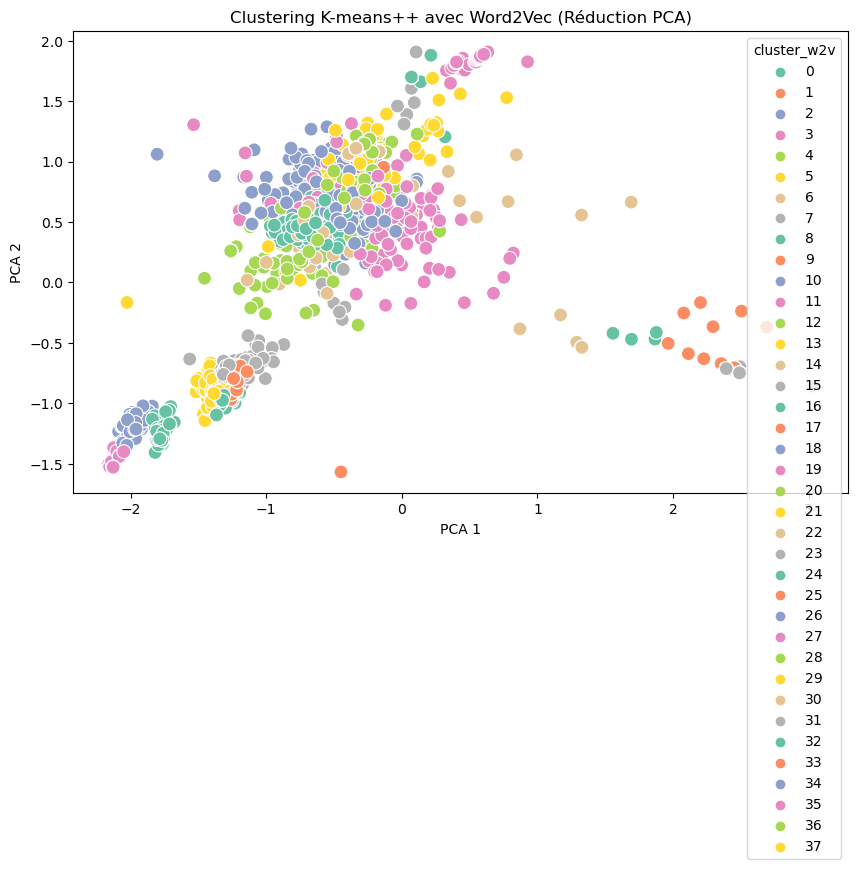

In [35]:
# Convertir la colonne 'doc_vector' en une matrice utilisable pour K-means
X_w2v = np.vstack(df_sampled['doc_vector'].values)

# Appliquer K-means avec le même nombre de clusters que le nombre de topics
kmeans_w2v = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans_w2v.fit(X_w2v)

# Ajouter les labels des clusters au DataFrame
df_sampled['cluster_w2v'] = kmeans_w2v.labels_

# Visualiser les résultats avec PCA comme précédemment
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Réduction de dimension avec PCA pour visualisation
pca_w2v = PCA(n_components=2)
X_pca_w2v = pca_w2v.fit_transform(X_w2v)

# Tracer les clusters obtenus avec Word2Vec
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_w2v[:, 0], y=X_pca_w2v[:, 1], hue=df_sampled['cluster_w2v'], palette='Set2', s=100)
plt.title('Clustering K-means++ avec Word2Vec (Réduction PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()



In [36]:
# Mesurer l'inertie (K-means)
inertia = kmeans_w2v.inertia_
print(f"Inertie (somme des distances au carré) : {inertia}")

# Mesurer l'indice de silhouette
silhouette_avg = silhouette_score(X_w2v, df_sampled['cluster_w2v'])
print(f"Indice de silhouette : {silhouette_avg}")

# Mesurer l'indice de Davies-Bouldin
davies_bouldin = davies_bouldin_score(X_w2v, df_sampled['cluster_w2v'])
print(f"Indice de Davies-Bouldin : {davies_bouldin}")

Inertie (somme des distances au carré) : 328.66224576094135
Indice de silhouette : 0.5644919128706869
Indice de Davies-Bouldin : 0.9936334558978813


## Word2Vec CBOW

In [50]:
import re
# Fonction pour convertir les topics multi-mots en un seul mot en CamelCase
def convert_to_camelcase(topic):
    return ''.join([word.capitalize() for word in topic.split()])

# Appliquer cette fonction à la colonne 'topics' pour créer des topics en CamelCase
df_sampled['topics_camelcase'] = df_sampled['topics'].apply(convert_to_camelcase)

# Combiner le sujet et le topic (CamelCase) pour l'entraînement du modèle Word2Vec
df_sampled['combined_text'] = df_sampled.apply(lambda row: row['source'] + ' ' + row['topics_camelcase'], axis=1)

# Appliquer la tokenisation sur la colonne 'combined_text'
df_sampled['tokenized_combined'] = df_sampled['combined_text'].apply(preprocess_text)


In [51]:
df_sampled['tokenized_combined'][0]

['need',
 'to',
 'transfer',
 'a',
 'recovr',
 'device',
 'from',
 'a',
 'customer',
 's',
 'trade',
 'in',
 'into',
 'his',
 'new',
 'car',
 'addatagorvehicle']

In [52]:
# Entraîner un modèle Word2Vec (CBOW) sur les textes combinés
model_cbow = Word2Vec(sentences=df_sampled['tokenized_combined'], vector_size=100, window=5, min_count=1, sg=0)

# Sauvegarder le modèle si nécessaire
model_cbow.save("cbow_model_topic_prediction_camelcase.model")



In [53]:
from gensim.models import Word2Vec

# Entraîner un modèle Word2Vec (CBOW) sur les textes combinés (avec les topics en minuscules)
model_cbow = Word2Vec(sentences=df_sampled['tokenized_combined'], vector_size=100, window=5, min_count=1, sg=0)

# Sauvegarder le modèle si nécessaire
model_cbow.save("cbow_model_topic_prediction_lowercase.model")


In [56]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Fonction pour obtenir le vecteur moyen d'une liste de tokens (tout en minuscules)
def get_mean_vector(tokens, model):
    valid_tokens = [word for word in tokens if word in model.wv]
    if not valid_tokens:  # Si aucun token valide, retourner un vecteur de zéros
        return np.zeros(model.wv.vector_size)
    return np.mean(model.wv[valid_tokens], axis=0)

# Nouveau sujet à prédire (en minuscules)
nouveau_sujet = "how do i change vehicles in the registration app?"

# Prétraiter le texte (tout en minuscules)
nouveau_sujet_tokenized = preprocess_text(nouveau_sujet)

# Obtenir le vecteur moyen du nouveau sujet
nouveau_sujet_vecteur = get_mean_vector(nouveau_sujet_tokenized, model_cbow).reshape(1, -1)

nouveau_sujet_vecteur                                                                                    

# Créer un ensemble des topics possibles (tout en minuscules)
topics_set = set(df_sampled['topics_camelcase'].unique())

# Préparer les vecteurs des topics (vérifier qu'ils sont dans le vocabulaire)
topics_vectors = np.array([model_cbow.wv[topic] for topic in topics_set if topic in model_cbow.wv])

# Vérification si topics_vectors est vide
if topics_vectors.size == 0:
    print("Aucun topic n'existe dans le vocabulaire Word2Vec.")
else:
    # Calculer les similarités cosinus entre le vecteur du sujet et les vecteurs des topics
    similarities = cosine_similarity(nouveau_sujet_vecteur, topics_vectors)

    # Si similarities est vide, renvoyer un message d'erreur
    if similarities.size == 0:
        print("Erreur : Pas de similarité trouvée. Vérifiez les vecteurs.")
    else:
        # Trouver le topic avec la similarité maximale
        topic_index = np.argmax(similarities)
        topic_predit = list(topics_set)[topic_index]

        # Afficher le topic prédit
        print(f"Le topic prédit pour le sujet est : {topic_predit}")



Aucun topic n'existe dans le vocabulaire Word2Vec.


## RoBERTa

In [23]:


# Compter les occurrences de chaque topic
top_10_topics = df_cleaned_all_columns['topics'].value_counts().nlargest(10).index.tolist()

# Filtrer les données pour ne conserver que celles avec les 10 topics les plus fréquents
df_filtered = df_cleaned_all_columns[df_cleaned_all_columns['topics'].isin(top_10_topics)]


In [24]:
df_filtered.shape


(24679, 9)

In [25]:
# Préparation des données filtrées
X = df_filtered['source'].tolist()  # Textes de la colonne 'source'
y = df_filtered['topics'].tolist()  # Topics filtrés

# Diviser les données en ensemble d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from transformers import AutoTokenizer

# Charger le tokenizer RoBERTa
model_name = "roberta-base"  # il faut essayer d'autre modéle
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokeniser les textes de l'ensemble d'entraînement et de test
train_encodings = tokenizer(X_train, truncation=True, padding=True, return_tensors='pt', max_length=128)
test_encodings = tokenizer(X_test, truncation=True, padding=True, return_tensors='pt', max_length=128)


C:\Users\helpdesk\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [27]:
from sklearn.preprocessing import LabelEncoder

# Encoder les topics en labels numériques
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch

# Charger le modèle RoBERTa pour la classification de séquences avec 10 labels
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=10)

# Créer un Dataset PyTorch pour l'entraînement
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, y_train_encoded)
test_dataset = CustomDataset(test_encodings, y_test_encoded)

# Définir les arguments d'entraînement
training_args = TrainingArguments(
    output_dir='./results',          # Répertoire de sortie
    evaluation_strategy="epoch",     # Évaluer à chaque époque
    per_device_train_batch_size=16,  # Taille du batch d'entraînement
    per_device_eval_batch_size=16,   # Taille du batch d'évaluation
    num_train_epochs=3,              # Nombre d'époques
    weight_decay=0.01,               # L2 weight decay
)

# Créer un Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Entraîner le modèle
trainer.train()


C:\Users\helpdesk\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model 

Epoch,Training Loss,Validation Loss
